<a href="https://colab.research.google.com/github/hadibudhy/fellowship/blob/main/Nur_Hadi_Budhy_Practical_Case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# English Premier League 2018-2019 Analysis

In this practice case, we will explore the English Premier League 2018-2019 dataset. The data set is wide-ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. This data was gathered from BBC Sports Football, Premierleague.com, and Transfermarkt.co.uk.


Some questions are given as the task, so we will answer the questions and give explanations for the answers. But before we go to question number one, let’s pre-processing the data.


## Preprocessing

First, we need to import some library and load the head of the data and the information of the data. In this dataset, some columns have structural errors because their numeric value has a comma that makes it type don’t represent the value. Therefore we need to remove the comma and assign the correct data type. Also, some columns have structural errors of inconsistent column names. Some columns have space in their name. So, we need to make the columns name homogenous in terms of consistency.

In [1]:
# Import library
import pandas as pd
import numpy as np
import klib
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset
df_raw = pd.read_csv('epl_1819.csv')
df_raw.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [3]:
# Check missing data and data type
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [4]:
# Create new dataframe
df_raw2 = df_raw.copy()

# Assign the correct data type
df_raw2['attack_passes'] = df_raw2['attack_passes'].str.replace(r'\D', '').astype(int)
df_raw2['attack_passes_long'] = df_raw2['attack_passes_long'].str.replace(r'\D', '').astype(int)
df_raw2['attack_passes_back'] = df_raw2['attack_passes_back'].str.replace(r'\D', '').astype(int)
df_raw2['defence_clearances'] = df_raw2['defence_clearances'].str.replace(r'\D', '').astype(int)

# Make columns name homogen
df_raw2.columns = df_raw2.columns.str.replace(' ', '') 

# Check the data
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team                          20 non-null     object 
 1   category                      20 non-null     object 
 2   general_league_position       20 non-null     int64  
 3   finance_live_games_televised  20 non-null     int64  
 4   finance_tv_revenue            20 non-null     int64  
 5   general_matches_played        20 non-null     int64  
 6   general_won                   20 non-null     int64  
 7   general_draw                  20 non-null     int64  
 8   general_lost                  20 non-null     int64  
 9   attack_scored                 20 non-null     int64  
 10  defence_goals_conceeded       20 non-null     int64  
 11  general_goal_difference       20 non-null     int64  
 12  general_points                20 non-null     int64  
 13  general

In [5]:
# Create new dataframe
df = df_raw2.copy()

# Check data
df.describe()

,general_league_position,finance_live_games_televised,finance_tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance_team_market,finance_market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,17433.100000,58.700000,2333.850000,2590.650000,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,862.600000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,4192.193659,33.625022,284.745182,679.843115,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,166.150661,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,10226.000000,15.000000,1774.000000,1418.000000,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,543.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,15006.500000,34.500000,2248.000000,2192.750000,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,768.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,16426.000000,50.500000,2325.000000,2427.000000,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,888.000000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.882800e+08,2.326060e+07,19602.750000,78.000000,2522.750000,2838.000000,713.500000,209.250000,517.750000,185.250000,12.000000,5.000000,53.250000,10.000000,71.250000,4.000000,5.000000,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,972.750000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,98.000000,28.000000,29.700000,27.000000,1.003200e+09,3.99872

Note: The number of non binary numerical features is very large (41), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


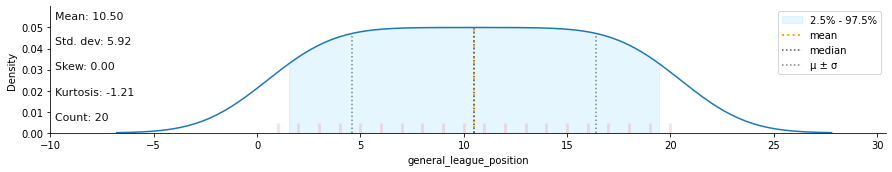

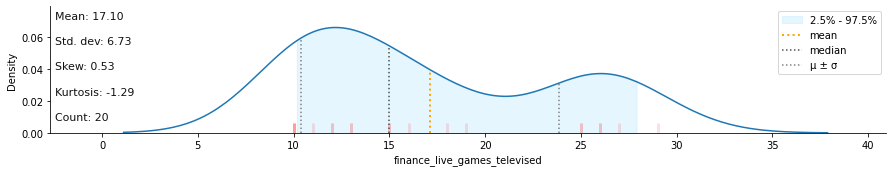

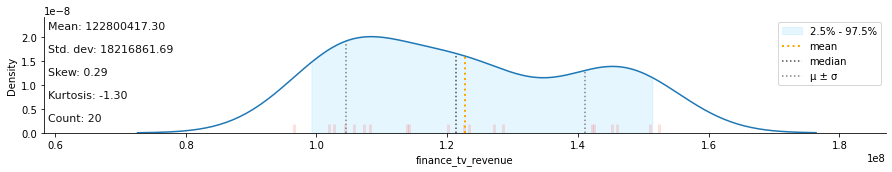

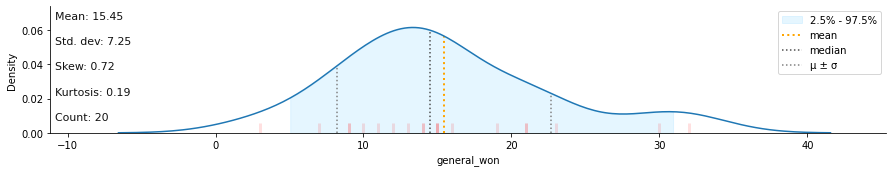

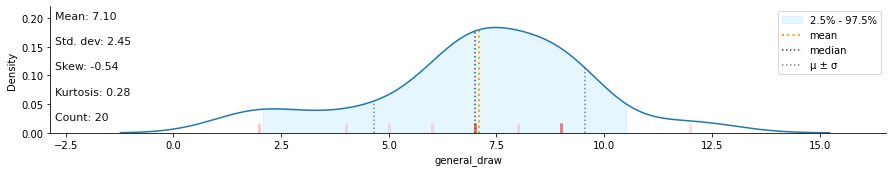

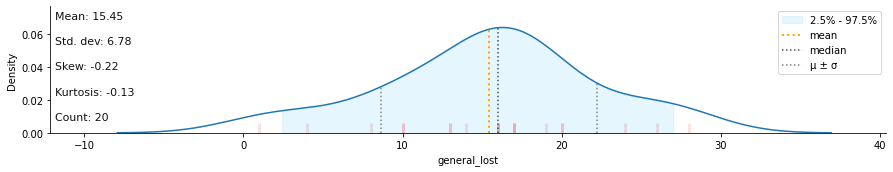

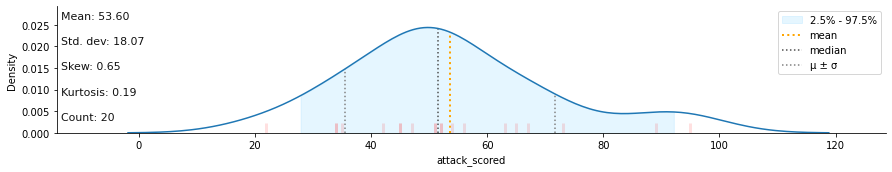

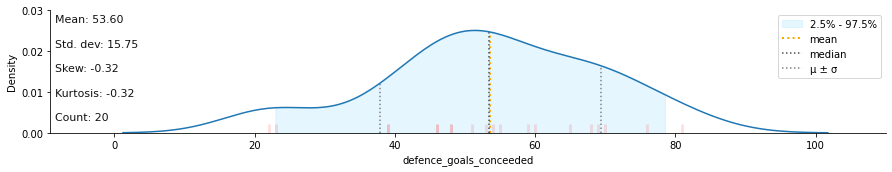

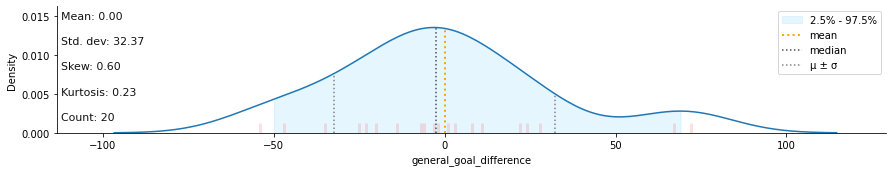

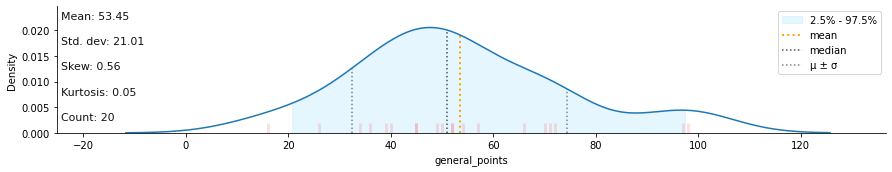

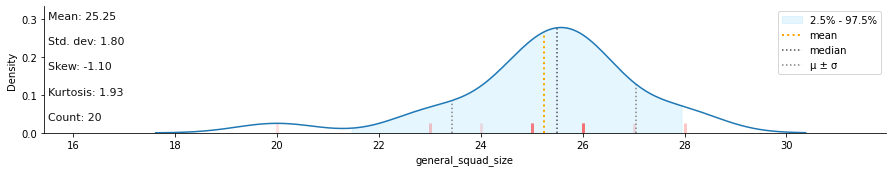

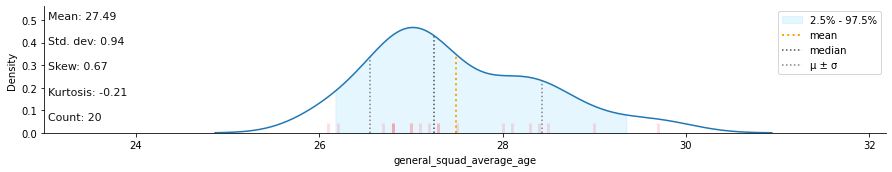

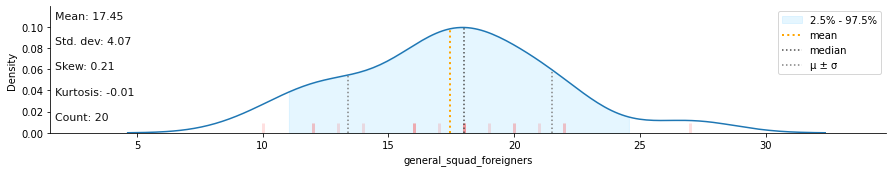

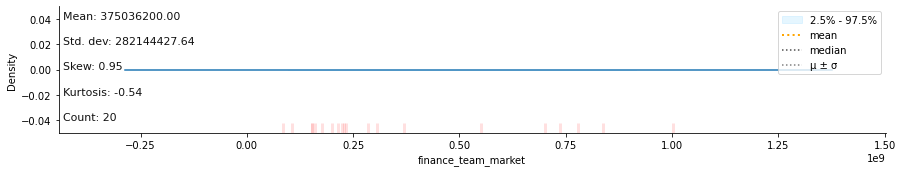

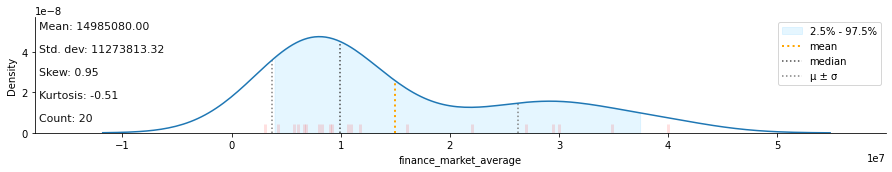

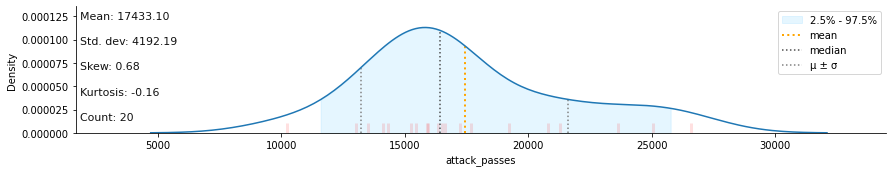

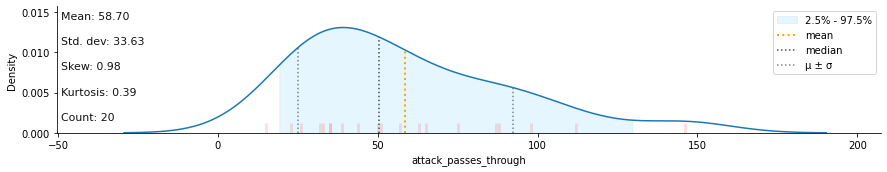

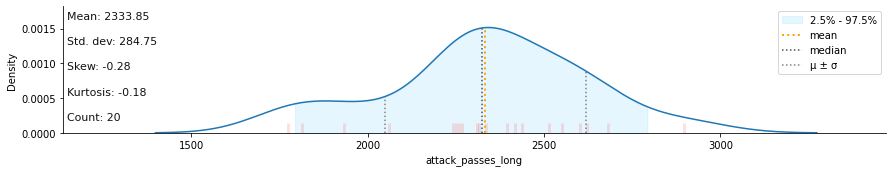

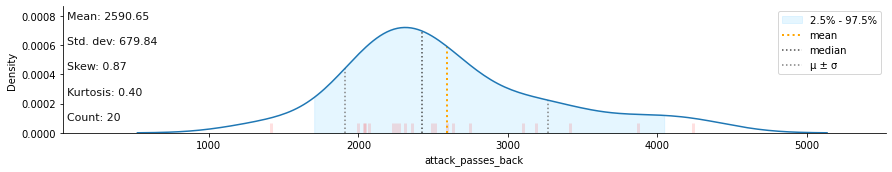

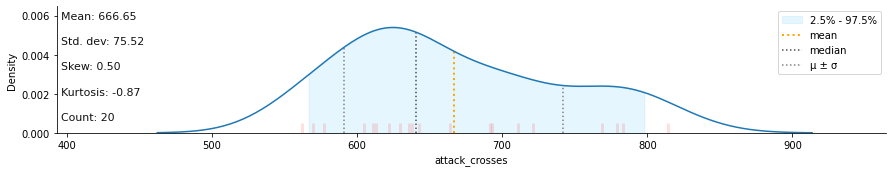

In [6]:
# Check numerical data distribution
klib.dist_plot(df)

GridSpec(6, 2)

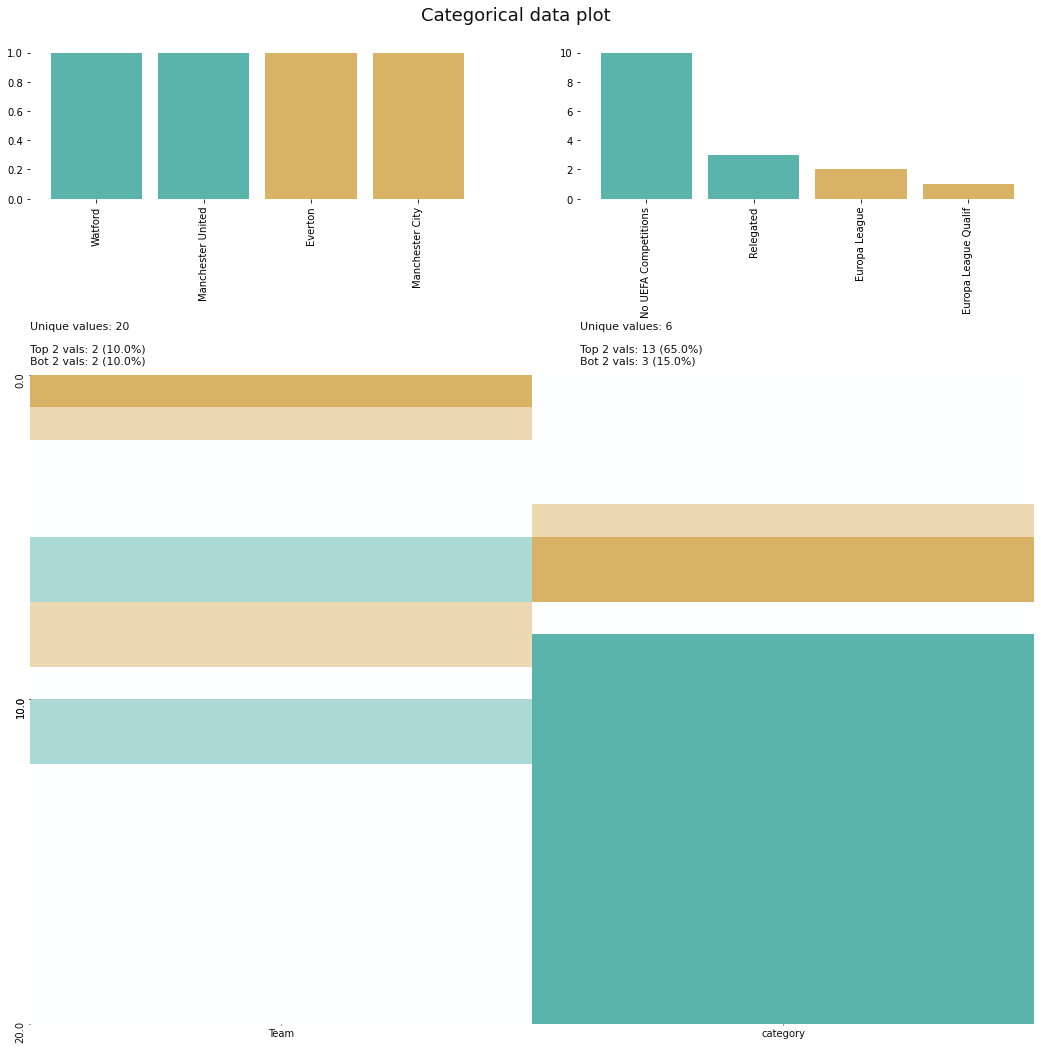

In [7]:
# Check categorical data distribution
klib.cat_plot(df, top=2, bottom=2)

Finally, we can move on to the question section!

## 1. Is This Data clean?

Base on the fact that some columns have structural errors because their numeric value has a comma that makes it type don’t represent the value. Also, some columns have structural errors of inconsistent column names (Some columns have space in their name). **So, we can conclude that the data is not clean yet.**
But don’t worry, we already clean the data so we can go to the next question!

## 2. How is the point distribution of the epl team? and which team is an anomaly?

To answer this question, we need to look at descriptive statistics, boxplot, distribution plot, bar chart, and several normality tests. Let’s check it one by one!

In [8]:
# Check point descriptive statistics
df.general_points.describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

In [9]:
# Check points distribution using boxplot
fig = px.box(df.general_points, y="general_points")
fig.show()

In [10]:
# Check points distribution using distribution plot
fig = ff.create_distplot([df.general_points],['general_points'],bin_size=30)
fig.show()

In [11]:
# Check points distribution using bar chart
fig = px.bar(x=df.Team, y=df.general_points, labels={'x':'Team', 'y':'Points'})
fig.show()

**Check point distribution with normality test**

In [12]:
# Shapiro normality test
stat, p = shapiro(df.general_points)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.953, p=0.411
Sample looks Gaussian (fail to reject H0)


In [13]:
# D'Agostino and Pearson's normality test
stat, p = normaltest(df.general_points)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.947, p=0.378
Sample looks Gaussian (fail to reject H0)


In [14]:
# Anderson normality test
result = anderson(df.general_points)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.385
15.000: 0.506, data looks normal (fail to reject H0)
10.000: 0.577, data looks normal (fail to reject H0)
5.000: 0.692, data looks normal (fail to reject H0)
2.500: 0.807, data looks normal (fail to reject H0)
1.000: 0.960, data looks normal (fail to reject H0)


Based on descriptive statistics, boxplot, distribution plot, bar chart, and several normality tests, we can conclude that the point distribution of the EPL team is following normal distribution and no team has an anomaly.

## 3. Which team has the best attack?

To answer this question, we need to do the feature selection. In my opinion, the best feature to score the team with the best attack is attack_scored. In this question, we will use the Pearson correlation to do the feature selection. At first, we will include all features which have an association with the attack. But, if the feature has a correlation of more than 0.7 or less than -0.7 then we will drop it because it’s already represented by attack_score. So, let’s check the correlation.

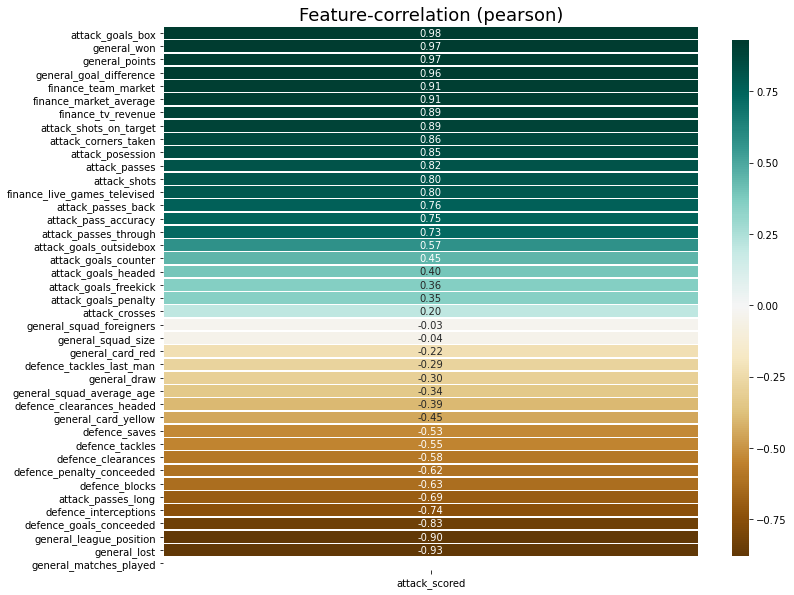

In [15]:
# Check correlation of attack_scored
klib.corr_plot(df, target='attack_scored')

After do the feature selection, the feature has been reduced. The selected feature are: attack_scored, attack_passes_through, attack_passes_long, attack_crosses, attack_goals_headed, attack_goals_penalty, attack_goals_outsidebox, attack_goals_counter,  and attack_goals_freekick.


So we already decide on the features, now we make a new data frame so we can sure that our main data frame is safe. Since these features have a different scale for their values, we should use a minmaxscaler from sklerarn to standardize the data. Next, we can sum the score from each category and sort the highest score to get the best attack team.

In [16]:
# Create team dataframe
team_pos = df[['Team', 'general_league_position']]
team_pos.head(2)

,Team,general_league_position
0,Manchester City,1
1,Liverpool,2


In [17]:
# Create team attack scoring dataframe
df_att = df[['general_league_position', 'attack_scored', 'attack_passes_through', 'attack_passes_long', 'attack_crosses', 'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick']].set_index('general_league_position')
df_att.head(2)

,attack_scored,attack_passes_through,attack_passes_long,attack_crosses,attack_goals_headed,attack_goals_penalty,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick
general_league_position,,,,,,,,,
1,95,112,1814,783,12,3,15,5,2
2,89,98,2250,721,19,7,5,6,1


In [18]:
# Declare standardization method
scaler = MinMaxScaler()

# Transform the data
scaler.fit(df_att)
score_att = pd.DataFrame(np.sum((scaler.transform(df_att)), axis=1), columns=['score_att'])

#Finalize and check the data
df_best_att = pd.merge(team_pos, score_att, left_index=True, right_index=True)
df_best_att.sort_values(by=['score_att'], ascending=False).head()

,Team,general_league_position,score_att
0,Manchester City,1,5.630807
1,Liverpool,2,5.558217
8,Leicester,9,5.481400
3,Tottenham,4,5.076891
5,Manchester United,6,4.316268


In [19]:
# Print Best Attacking Team
print('Best team with the best attack is: ', '\n', df_best_att.sort_values(by='score_att',ascending=False).iloc[0])

Best team with the best attack is:  
 Team                       Manchester City
general_league_position                  1
score_att                          5.63081
Name: 0, dtype: object


In [20]:
# Visualize Best Attacking Team
fig = px.bar(x=df_best_att.score_att, y=df_best_att.Team, labels={'x':'Score', 'y':'Team'}, orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

## 4. Which team has the best defence?

To answer this question, we need to do the feature selection. In my opinion, the best feature to score the team with the best defence is defence_goals_conceeded. In this question, we will use the Pearson correlation to do the feature selection. At first, we will include all features which have an association with the defence. But, if the feature correlates with more than 0.7 or less than -0.7 then we will drop it because it’s already represented by defence_goals_conceeded. So, let’s check the correlation.

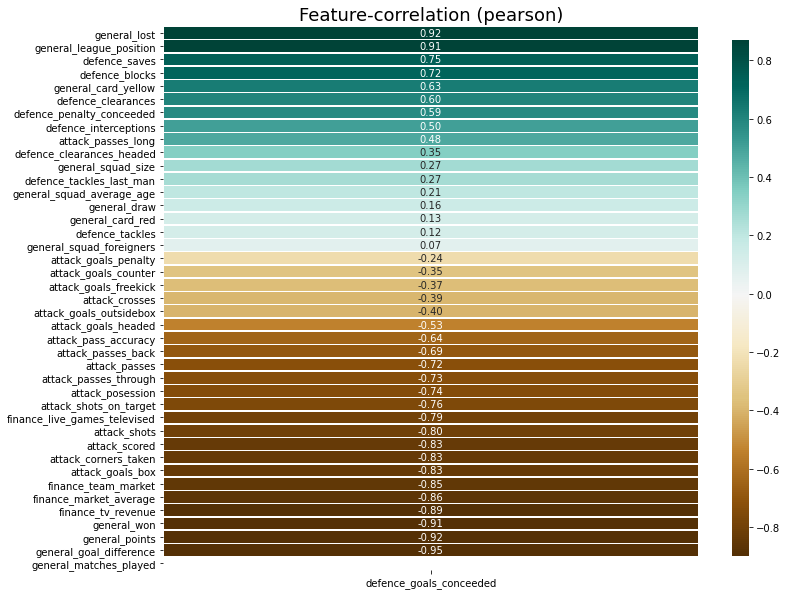

In [21]:
# Check correlation of defence_goals_conceded
klib.corr_plot(df, target='defence_goals_conceeded')

After do the feature selection, the feature has been reduced. The selected feature are: 'defence_interceptions', 'defence_tackles', 'defence_clearances', 'defence_goals_conceeded', 'defence_penalty_conceeded'. Also we add 'general_points',  'general_card_yellow', and 'general_card_red',
 
 
So we already decide on the features, now we make a new data frame so we can sure that our main data frame is safe. Since these features have a different scale for their values, we should use a minmaxscaler from sklerarn to standardize the data. But, we need to reverse the standardize for defence_goals_conceeded', 'defence_penalty_conceeded', 'general_card_yellow', and 'general_card_red'. Because in this feature, the less the better.  Next, we can sum the score from each category and sort the highest score to get the best defence team. 

In [22]:
# Create team defence scoring dataframe
df_def1 = df[['general_league_position', 'general_points', 'defence_interceptions', 'defence_tackles', 'defence_clearances']].set_index('general_league_position')
df_def2 = df[['general_league_position', 'defence_goals_conceeded', 'defence_penalty_conceeded', 'general_card_yellow', 'general_card_red']].set_index('general_league_position')

# Check dataframe
df_def1.head(2)

,general_points,defence_interceptions,defence_tackles,defence_clearances
general_league_position,,,,
1,98,362,518,543
2,97,314,610,639


In [23]:
#Check dataframe
df_def2.head(2)

,defence_goals_conceeded,defence_penalty_conceeded,general_card_yellow,general_card_red
general_league_position,,,,
1,23,4,44,1
2,22,1,38,2


In [24]:
# Transform the data
scaler.fit(df_def1)
score_def1 = pd.DataFrame(np.sum((scaler.transform(df_def1)), axis=1), columns=['score_def1'])

# Transform the data with descending scoring
scaler2 = MinMaxScaler(feature_range= (-1, 0))
scaler2.fit(df_def2)
score_def2 = pd.DataFrame(np.sum((scaler2.transform(df_def2)), axis=1), columns=['score_def2'])

#Finalize and check the data
score_def = pd.DataFrame(np.subtract(score_def1.to_numpy(), score_def2.to_numpy()), columns=['score_def'])
df_best_def = pd.merge(team_pos, score_def, left_index=True, right_index=True)
df_best_def.sort_values(by=['score_def'], ascending=False).head()

,Team,general_league_position,score_def
1,Liverpool,2,5.188145
12,Newcastle,13,5.104176
6,Wolverhampton,7,4.927069
9,West Ham,10,4.815617
11,Crystal Palace,12,4.771894


In [25]:
# Print Best Defending Team
print('Best team with the best defend is: ', '\n', df_best_def.sort_values(by='score_def',ascending=False).iloc[0])

Best team with the best defend is:  
 Team                       Liverpool
general_league_position            2
score_def                    5.18814
Name: 1, dtype: object


In [26]:
# Visualize Best Defending Team
fig = px.bar(x=df_best_def.score_def, y=df_best_def.Team, labels={'x':'Score', 'y':'Team'}, orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

## 5. Which team is good in financial aspect?

To answer this question, due to limited data, we will not do feature selection.  The selected feature are: 'finance_tv_revenue', 'finance_team_market', and 'finance_market_average'. Now we make a new data frame so we can sure that our main data frame is safe. Since these features have a different scale for their values, we should use a minmaxscaler from sklerarn to standardize the data. Next, we can sum the score from each category and sort the highest score to get the team with best financial.

In [27]:
# Create team finance scoring dataframe
df_fin = df[['general_league_position', 'finance_tv_revenue', 'finance_team_market', 'finance_market_average']].set_index('general_league_position')
df_fin.head(2)

,finance_tv_revenue,finance_team_market,finance_market_average
general_league_position,,,
1,150986355,1003200000,39987200
2,152425146,836440000,34848000


In [28]:
# Transform the data
scaler.fit(df_fin)
score_fin = pd.DataFrame(np.sum((scaler.transform(df_fin)), axis=1), columns=['score_fin'])

#Finalize and check the data
df_best_fin = pd.merge(team_pos, score_fin, left_index=True, right_index=True)
df_best_fin.sort_values(by=['score_fin'], ascending=False).head()

,Team,general_league_position,score_fin
0,Manchester City,1,2.974213
1,Liverpool,2,2.679139
2,Chelsea,3,2.370677
3,Tottenham,4,2.292677
4,Arsenal,5,2.136274


In [29]:
# Print Best Financial Team
print('Best team with the best financial is: ', '\n', df_best_fin.sort_values(by='score_fin',ascending=False).iloc[0])

Best team with the best financial is:  
 Team                       Manchester City
general_league_position                  1
score_fin                          2.97421
Name: 0, dtype: object


In [30]:
# Visualize Team with Best Financial
fig = px.bar(x=df_best_fin.score_fin, y=df_best_fin.Team, labels={'x':'Score', 'y':'Team'}, orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

## Creativity Time

###Most Fair Play and Violence Team

To answer this question, due to limited data, we will not do the feature selection.  The selected feature are: 'general_card_yellow' and 'general_card_red'. Now we make a new data frame so we can sure that our main data frame is safe. Since these features have the same scale for their values, we just can sum the feature. However, the red card has had a higher value than a yellow card. Therefore we need to multiply it by 2. Next, we can sum the score from each category. The most fair play team is the team with the lowest score, on the other hand, the most violence team is the team with the highest score. 

In [31]:
df_card = df[['Team', 'general_card_yellow', 'general_card_red']]
df_card['general_card_red'] = df_card['general_card_red'] * 2
df_card['total_card'] = df_card.apply(lambda x: x['general_card_red'] + x['general_card_yellow'], axis=1)
df_card.head(2)

,Team,general_card_yellow,general_card_red,total_card
0,Manchester City,44,2,46
1,Liverpool,38,4,42


In [32]:
# Print Most Fair Play Team
print('Most Fair Play Team is: ', '\n', df_card.sort_values(by='total_card',ascending=True).iloc[0])

Most Fair Play Team is:  
 Team                   Liverpool
general_card_yellow           38
general_card_red               4
total_card                    42
Name: 1, dtype: object


In [33]:
# Print Most Violence Team
print('Most Violence Team is: ', '\n', df_card.sort_values(by='total_card',ascending=False).iloc[0])

Most Violence Team is:  
 Team                   Watford
general_card_yellow         77
general_card_red             8
total_card                  85
Name: 10, dtype: object


In [34]:
# Visualize Most Fairplay Team To Most Violence Team
fig = px.bar(x=df_card.total_card, y=df_card.Team, labels={'x':'Card', 'y':'Team'}, orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()